<a href="https://colab.research.google.com/github/basharE/data-science-lab/blob/main/data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Lab - Fifa data set

## Notebook Configuration



> `The notebook starts with some importnat configuration, which helps in executing the code faster and correctly`



### Installing packages/Imports



> `In this block we are installing all the libraries used in the notebook, we also importing all the packages which were vital to our code`



In [1]:
!pip install -U -q PyDrive
!pip install shap
!pip install boruta
!pip install BorutaShap
!pip install catboost
!pip install verstack

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
from scipy.special import softmax
from boruta import BorutaPy
from BorutaShap import BorutaShap
from verstack import LGBMTuner
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import seaborn as sn
sn.set_style(style='darkgrid')
import matplotlib.pyplot as plt
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 3.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 3.8 MB/s 
     |████████████████████████████████| 23.2 MB 778 kB/s 
     |████████████████████████████████| 2.0 MB 46.2 MB/s 
     |████████████████████████████████| 308 kB 62.3 MB/s 
     |████████████████████████████████| 23.9 MB 89.1 MB/s 
     |████████████████████████████████| 227 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Models Imports



> `All the regression models used in the notebook was imported here and used in later sections`





In [2]:
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor

### Install GPU



> `A GPU was configured for this notebook instead of using default CPU, for enabling the notebook to execute the code faster`



In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Jun 17 21:20:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Memory Details



> `More memory also was configured for this notebook instead of using default memory, for enabling the notebook to execute the code faster, we can see bellow the memory details that was configured`


In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


### Warnings handling 



> `Warnings was disabled (unimportant)`



In [5]:
import warnings
warnings.filterwarnings('ignore')

## Uploading data 



> `In this section we are uploading the data set that will be used in the notebook. The data set was downloaded from kaggle, and uploaded to google drive and then we configured the notebook to connect google drive for using this data set.
The data set contains 7 files each file contain data on FIfa fottball players in specific year.
Years range covered in the data set was from year 2015 to year 2021.
Finally in this section all the files were concated to one data frame that will be used later in the notebook.`



### Connecting to google drive



> `A section for connecting to google drive for downloading data set`



In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Uploading csv files



>` Here is the files list that we are uploading to the notebook from google drive`



In [7]:
df_15_csv = pd.read_csv("/content/drive/MyDrive/Data_Science_Lab/players_15.csv", delimiter=",")
df_16_csv = pd.read_csv("/content/drive/MyDrive/Data_Science_Lab/players_16.csv", delimiter=",")
df_17_csv = pd.read_csv("/content/drive/MyDrive/Data_Science_Lab/players_17.csv", delimiter=",")
df_18_csv = pd.read_csv("/content/drive/MyDrive/Data_Science_Lab/players_18.csv", delimiter=",")
df_19_csv = pd.read_csv("/content/drive/MyDrive/Data_Science_Lab/players_19.csv", delimiter=",")
df_20_csv = pd.read_csv("/content/drive/MyDrive/Data_Science_Lab/players_20.csv", delimiter=",")
df_21_csv = pd.read_csv("/content/drive/MyDrive/Data_Science_Lab/players_21.csv", delimiter=",")

### Concating data files 



> `And here we are concating our files to one data frame`




In [8]:
df_con = pd.concat([df_15_csv, df_16_csv, df_17_csv, df_18_csv, df_19_csv, df_20_csv, df_21_csv])

In [9]:
df_con.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [10]:
df_con.columns[df_con.isnull().any()].tolist()

['club_name',
 'league_name',
 'league_rank',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'mentality_composure',
 'defending_marking']

## Data Cleanning

>` In this section we are cleanning all our data so it can be later used by regression models.`
> `Cleanning will include dealing with nulls, dealing with strings, dealing with unwanted data, in general we will understand the data and prepair it for using later.`



### Removing Useless Data

> `Here we are removing useless features, we think that these features are not importnat to our models as from our understanding to the data these features will not contribute anything to our model.`

In [11]:
useless_column_1 = ['dob','sofifa_id','player_url','short_name','long_name','real_face','value_eur','player_tags','loaned_from','joined','player_traits','mentality_composure','release_clause_eur','work_rate','player_positions']
useless_column_2 = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [12]:
fifa_df = df_con.drop(useless_column_1, axis = 1)
fifa_df = fifa_df.drop(useless_column_2, axis = 1)

### Label Encoding for Text Columns

> `In this section we encoded all categorial data to numbers to enable modles to take them into considiration in the model regression`

#### column "nationality"

In [13]:
# converting type of columns to 'category'
fifa_df['nationality'] = fifa_df['nationality'].astype('category')
# Assigning numerical values and storing in another column
fifa_df['nationality_Cat'] = fifa_df['nationality'].cat.codes

fifa_df = fifa_df.drop(['nationality'], axis = 1)

#### column "club_name"

In [14]:
# converting type of columns to 'category'
fifa_df['club_name'] = fifa_df['club_name'].astype('category')
# Assigning numerical values and storing in another column
fifa_df['club_name_Cat'] = fifa_df['club_name'].cat.codes

fifa_df = fifa_df.drop(['club_name'], axis = 1)

#### column "league_name"

In [15]:
# converting type of columns to 'category'
fifa_df['league_name'] = fifa_df['league_name'].astype('category')
# Assigning numerical values and storing in another column
fifa_df['league_name_Cat'] = fifa_df['league_name'].cat.codes

fifa_df = fifa_df.drop(['league_name'], axis = 1)

#### column "preferred_foot"

In [16]:
# converting type of columns to 'category'
fifa_df['preferred_foot'] = fifa_df['preferred_foot'].astype('category')
# Assigning numerical values and storing in another column
fifa_df['preferred_foot_Cat'] = fifa_df['preferred_foot'].cat.codes

fifa_df = fifa_df.drop(['preferred_foot'], axis = 1)

#### column "body_type"

In [17]:
# converting type of columns to 'category'
fifa_df['body_type'] = fifa_df['body_type'].astype('category')
# Assigning numerical values and storing in another column
fifa_df['body_type_Cat'] = fifa_df['body_type'].cat.codes

fifa_df = fifa_df.drop(['body_type'], axis = 1)

#### column "nation_position"

In [18]:
# converting type of columns to 'category'
fifa_df['nation_position'] = fifa_df['nation_position'].astype('category')
# Assigning numerical values and storing in another column
fifa_df['nation_position_Cat'] = fifa_df['nation_position'].cat.codes

fifa_df = fifa_df.drop(['nation_position'], axis = 1)

#### column "team_position"

In [19]:
# converting type of columns to 'category'
fifa_df['team_position'] = fifa_df['team_position'].astype('category')
# Assigning numerical values and storing in another column
fifa_df['team_position_Cat'] = fifa_df['team_position'].cat.codes

fifa_df = fifa_df.drop(['team_position'], axis = 1)

In [20]:
len(fifa_df)

122841

In [21]:
fifa_df["league_rank"].describe()

count    121272.000000
mean          1.378282
std           0.751320
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: league_rank, dtype: float64


### Proccessing nulls 

> `After proccecing the categorial features we now need to handle the nulls in our data, and this is exactly what we are doing in this section, as first step we count nulls in the whole data set, to appoint candidate features with nulls.
For each feature we handle its nulls accordingly, so for example some nulls filled with mean and some with max etc.`




#### count nulls

In [22]:
def count_nulls():
  null_count = pd.isnull(fifa_df).sum()
  is_null = null_count > 0
  print(null_count[is_null])

In [23]:
count_nulls()

league_rank               1569
team_jersey_number        1569
contract_valid_until      1569
nation_jersey_number    115156
pace                     13659
shooting                 13659
passing                  13659
dribbling                13659
defending                13659
physic                   13659
gk_diving               109182
gk_handling             109182
gk_kicking              109182
gk_reflexes             109182
gk_speed                109182
gk_positioning          109182
defending_marking        37427
dtype: int64


#### normalise columns and combine

> `In this section we are combinning two features to one, and this after normalising both features, and this operation was done after understanding some details about each feature and this helped us to conclude that some features can be combined.`

In [24]:
def normalise_column(column):
  cols_to_norm = [column]
  column_normalisied = column + '_normalisied'

  fifa_df[column_normalisied] = MinMaxScaler().fit_transform(np.array(fifa_df[cols_to_norm]).reshape(-1,1))

##### gk_speed -> pace

In [25]:
fifa_df["gk_speed"].describe()

count    13659.000000
mean        40.014057
std         10.301557
min         12.000000
25%         32.000000
50%         42.000000
75%         47.000000
max         68.000000
Name: gk_speed, dtype: float64

In [26]:
normalise_column("gk_speed")

In [27]:
fifa_df["gk_speed_normalisied"].describe()

count    13659.000000
mean         0.500251
std          0.183956
min          0.000000
25%          0.357143
50%          0.535714
75%          0.625000
max          1.000000
Name: gk_speed_normalisied, dtype: float64

In [28]:
normalise_column("pace")

In [29]:
fifa_df["pace"].describe()

count    109182.000000
mean         67.946154
std          11.153844
min          21.000000
25%          62.000000
50%          69.000000
75%          75.000000
max          97.000000
Name: pace, dtype: float64

In [30]:
fifa_df["pace_normalisied"].describe()

count    109182.000000
mean          0.617713
std           0.146761
min           0.000000
25%           0.539474
50%           0.631579
75%           0.710526
max           1.000000
Name: pace_normalisied, dtype: float64

In [31]:
fifa_df["pace_gk_speed_combined"] = fifa_df["pace_normalisied"].fillna(fifa_df["gk_speed_normalisied"])

In [32]:
fifa_df["pace_gk_speed_combined"].describe()

count    122841.000000
mean          0.604652
std           0.155788
min           0.000000
25%           0.517857
50%           0.618421
75%           0.710526
max           1.000000
Name: pace_gk_speed_combined, dtype: float64

##### gk_kicking -> shooting 

In [33]:
fifa_df["gk_kicking"].describe()

count    13659.000000
mean        61.153964
std          8.010121
min         21.000000
25%         56.000000
50%         61.000000
75%         66.000000
max         95.000000
Name: gk_kicking, dtype: float64

In [34]:
normalise_column("gk_kicking")

In [35]:
fifa_df["gk_kicking_normalisied"].describe()

count    13659.000000
mean         0.542621
std          0.108245
min          0.000000
25%          0.472973
50%          0.540541
75%          0.608108
max          1.000000
Name: gk_kicking_normalisied, dtype: float64

In [36]:
normalise_column("shooting")

In [37]:
fifa_df["shooting"].describe()

count    109182.000000
mean         52.164853
std          13.918054
min          14.000000
25%          42.000000
50%          54.000000
75%          63.000000
max          93.000000
Name: shooting, dtype: float64

In [38]:
fifa_df["shooting_normalisied"].describe()

count    109182.000000
mean          0.483099
std           0.176178
min           0.000000
25%           0.354430
50%           0.506329
75%           0.620253
max           1.000000
Name: shooting_normalisied, dtype: float64

In [39]:
fifa_df["shooting_gk_kicking_combined"] = fifa_df["shooting_normalisied"].fillna(fifa_df["gk_kicking_normalisied"])

In [40]:
fifa_df["shooting_gk_kicking_combined"].describe()

count    122841.000000
mean          0.489718
std           0.170998
min           0.000000
25%           0.367089
50%           0.518987
75%           0.620253
max           1.000000
Name: shooting_gk_kicking_combined, dtype: float64

##### gk_handling -> passing


In [41]:
fifa_df["gk_handling"].describe()

count    13659.000000
mean        62.485248
std          7.942942
min         36.000000
25%         57.000000
50%         62.000000
75%         68.000000
max         92.000000
Name: gk_handling, dtype: float64

In [42]:
normalise_column("gk_handling")

In [43]:
fifa_df["gk_handling_normalisied"].describe()

count    13659.000000
mean         0.472951
std          0.141838
min          0.000000
25%          0.375000
50%          0.464286
75%          0.571429
max          1.000000
Name: gk_handling_normalisied, dtype: float64

In [44]:
normalise_column("passing")

In [45]:
fifa_df["passing"].describe()

count    109182.000000
mean         56.821134
std          10.625732
min          20.000000
25%          50.000000
50%          58.000000
75%          64.000000
max          93.000000
Name: passing, dtype: float64

In [46]:
fifa_df["passing_normalisied"].describe()

count    109182.000000
mean          0.504399
std           0.145558
min           0.000000
25%           0.410959
50%           0.520548
75%           0.602740
max           1.000000
Name: passing_normalisied, dtype: float64

In [47]:
fifa_df["passing_gk_handling_combined"] = fifa_df["passing_normalisied"].fillna(fifa_df["gk_handling_normalisied"])

In [48]:
fifa_df["passing_gk_handling_combined"].describe()

count    122841.000000
mean          0.500902
std           0.145485
min           0.000000
25%           0.410714
50%           0.506849
75%           0.602740
max           1.000000
Name: passing_gk_handling_combined, dtype: float64

##### gk_reflexes -> dribbling 


In [49]:
fifa_df["gk_reflexes"].describe()

count    13659.000000
mean        66.196720
std          8.341247
min         31.000000
25%         60.000000
50%         66.000000
75%         72.000000
max         94.000000
Name: gk_reflexes, dtype: float64

In [50]:
normalise_column("gk_reflexes")

In [51]:
fifa_df["gk_reflexes_normalisied"].describe()

count    13659.000000
mean         0.558678
std          0.132401
min          0.000000
25%          0.460317
50%          0.555556
75%          0.650794
max          1.000000
Name: gk_reflexes_normalisied, dtype: float64

In [52]:
normalise_column("dribbling")

In [53]:
fifa_df["dribbling"].describe()

count    109182.000000
mean         61.928175
std          10.507510
min          22.000000
25%          56.000000
50%          63.000000
75%          69.000000
max          96.000000
Name: dribbling, dtype: float64

In [54]:
fifa_df["dribbling_normalisied"].describe()

count    109182.000000
mean          0.539570
std           0.141993
min           0.000000
25%           0.459459
50%           0.554054
75%           0.635135
max           1.000000
Name: dribbling_normalisied, dtype: float64

In [55]:
fifa_df["dribbling_gk_reflexes_combined"] = fifa_df["dribbling_normalisied"].fillna(fifa_df["gk_reflexes_normalisied"])

In [56]:
fifa_df["dribbling_gk_reflexes_combined"].describe()

count    122841.000000
mean          0.541695
std           0.141086
min           0.000000
25%           0.459459
50%           0.554054
75%           0.635135
max           1.000000
Name: dribbling_gk_reflexes_combined, dtype: float64

##### gk_diving -> defending 


In [57]:
fifa_df["gk_diving"].describe()

count    13659.000000
mean        65.264514
std          7.860678
min         35.000000
25%         60.000000
50%         65.000000
75%         70.000000
max         91.000000
Name: gk_diving, dtype: float64

In [58]:
normalise_column("gk_diving")

In [59]:
fifa_df["gk_diving_normalisied"].describe()

count    13659.000000
mean         0.540438
std          0.140369
min          0.000000
25%          0.446429
50%          0.535714
75%          0.625000
max          1.000000
Name: gk_diving_normalisied, dtype: float64

In [60]:
normalise_column("defending")

In [61]:
fifa_df["defending"].describe()

count    109182.000000
mean         50.948984
std          16.770419
min          14.000000
25%          35.000000
50%          55.000000
75%          65.000000
max          91.000000
Name: defending, dtype: float64

In [62]:
fifa_df["defending_normalisied"].describe()

count    109182.000000
mean          0.479857
std           0.217798
min           0.000000
25%           0.272727
50%           0.532468
75%           0.662338
max           1.000000
Name: defending_normalisied, dtype: float64

In [63]:
fifa_df["defending_gk_diving_combined"] = fifa_df["defending_normalisied"].fillna(fifa_df["gk_diving_normalisied"])

In [64]:
fifa_df["defending_gk_diving_combined"].describe()

count    122841.000000
mean          0.486593
std           0.211459
min           0.000000
25%           0.298701
50%           0.535714
75%           0.649351
max           1.000000
Name: defending_gk_diving_combined, dtype: float64

##### gk_positioning -> physic

In [65]:
fifa_df["gk_positioning"].describe()

count    13659.000000
mean        62.790029
std          8.822520
min         37.000000
25%         57.000000
50%         63.000000
75%         69.000000
max         91.000000
Name: gk_positioning, dtype: float64

In [66]:
normalise_column("gk_positioning")

In [67]:
fifa_df["gk_positioning_normalisied"].describe()

count    13659.000000
mean         0.477593
std          0.163380
min          0.000000
25%          0.370370
50%          0.481481
75%          0.592593
max          1.000000
Name: gk_positioning_normalisied, dtype: float64

In [68]:
normalise_column("physic")

In [69]:
fifa_df["physic"].describe()

count    109182.000000
mean         64.828681
std           9.721181
min          27.000000
25%          58.250000
50%          66.000000
75%          72.000000
max          92.000000
Name: physic, dtype: float64

In [70]:
fifa_df["physic_normalisied"].describe()

count    109182.000000
mean          0.581980
std           0.149557
min           0.000000
25%           0.480769
50%           0.600000
75%           0.692308
max           1.000000
Name: physic_normalisied, dtype: float64

In [71]:
fifa_df["physic_gk_positioning_normalisied"] = fifa_df["physic_normalisied"].fillna(fifa_df["gk_positioning_normalisied"])

In [72]:
fifa_df["physic_gk_positioning_normalisied"].describe()

count    122841.000000
mean          0.570373
std           0.154677
min           0.000000
25%           0.462963
50%           0.584615
75%           0.692308
max           1.000000
Name: physic_gk_positioning_normalisied, dtype: float64

##### drop unwanted columns

In [73]:
# fifa_df = fifa_df.drop(['overall'], axis = 1)

fifa_df = fifa_df.drop(['pace'], axis = 1)
fifa_df = fifa_df.drop(['shooting'], axis = 1)
fifa_df = fifa_df.drop(['passing'], axis = 1)
fifa_df = fifa_df.drop(['dribbling'], axis = 1)
fifa_df = fifa_df.drop(['defending'], axis = 1)
fifa_df = fifa_df.drop(['physic'], axis = 1)

fifa_df = fifa_df.drop(['gk_speed'], axis = 1)
fifa_df = fifa_df.drop(['gk_kicking'], axis = 1)
fifa_df = fifa_df.drop(['gk_handling'], axis = 1)
fifa_df = fifa_df.drop(['gk_reflexes'], axis = 1)
fifa_df = fifa_df.drop(['gk_diving'], axis = 1)
fifa_df = fifa_df.drop(['gk_positioning'], axis = 1)

fifa_df = fifa_df.drop(['gk_speed_normalisied'], axis = 1)
fifa_df = fifa_df.drop(['pace_normalisied'], axis = 1)
fifa_df = fifa_df.drop(['gk_kicking_normalisied'], axis = 1)
fifa_df = fifa_df.drop(['shooting_normalisied'], axis = 1)
fifa_df = fifa_df.drop(['gk_handling_normalisied'], axis = 1)
fifa_df = fifa_df.drop(['passing_normalisied'], axis = 1)

fifa_df = fifa_df.drop(['gk_reflexes_normalisied'], axis = 1)
fifa_df = fifa_df.drop(['dribbling_normalisied'], axis = 1)
fifa_df = fifa_df.drop(['gk_diving_normalisied'], axis = 1)
fifa_df = fifa_df.drop(['defending_normalisied'], axis = 1)
fifa_df = fifa_df.drop(['gk_positioning_normalisied'], axis = 1)
fifa_df = fifa_df.drop(['physic_normalisied'], axis = 1)

fifa_df = fifa_df.drop(['team_jersey_number'], axis = 1)
fifa_df = fifa_df.drop(['nation_jersey_number'], axis = 1)
fifa_df = fifa_df.drop(['defending_marking'], axis = 1)

In [74]:
count_nulls()

league_rank             1569
contract_valid_until    1569
dtype: int64


#### replace null's

##### league_rank column with mean

In [75]:
fifa_df["league_rank"].describe()

count    121272.000000
mean          1.378282
std           0.751320
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: league_rank, dtype: float64

In [76]:
#Finding the mean of the column having NaN

mean_value=math.floor(fifa_df["league_rank"].mean())
print(mean_value)

# Replace NaNs in column league_rank with the
# mean of values in the same column
fifa_df["league_rank"].fillna(value=mean_value, inplace=True)

1


In [77]:
fifa_df["league_rank"].describe()

count    122841.000000
mean          1.373450
std           0.747714
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: league_rank, dtype: float64

##### contract_valid_until column with max date

In [78]:
fifa_df["contract_valid_until"].describe()

count    121272.000000
mean       2019.478470
std           2.303282
min        2014.000000
25%        2018.000000
50%        2020.000000
75%        2021.000000
max        2028.000000
Name: contract_valid_until, dtype: float64

In [79]:
#Finding the mean of the column having NaN

max_value=math.floor(fifa_df["contract_valid_until"].max())
print(max_value)

# Replace NaNs in column league_rank with the
# mean of values in the same column
fifa_df["contract_valid_until"].fillna(value=max_value, inplace=True)

2028


In [80]:
fifa_df["contract_valid_until"].describe()

count    122841.000000
mean       2019.587312
std           2.480526
min        2014.000000
25%        2018.000000
50%        2020.000000
75%        2021.000000
max        2028.000000
Name: contract_valid_until, dtype: float64

In [81]:
count_nulls()

Series([], dtype: int64)


## Create new feature

> `Here we noticed that we can create a new feature, as we have two features that can be calculated to this new feature (BMI)`

In [82]:
fifa_df['BMI'] = fifa_df ['weight_kg'] / (fifa_df['height_cm'] / 100) ** 2
fifa_df = fifa_df.drop(['weight_kg'], axis = 1)
fifa_df = fifa_df.drop(['height_cm'], axis = 1)

## Outliers detection 

> `We will use IsolationForest model for detecting 5% most outliers elements`

In [83]:
from sklearn.ensemble import IsolationForest

In [84]:
model=IsolationForest(n_estimators=1000, contamination=0.05)
fifa_df['anomaly'] =model.fit_predict(fifa_df)

In [85]:
unique, counts = np.unique(fifa_df['anomaly'], return_counts=True)
dict(zip(unique, counts))

{-1: 6142, 1: 116699}

Deleting the outliers detected above

In [86]:
len(fifa_df)
fifa_df_tmp = fifa_df

In [87]:
len(fifa_df_tmp)

122841

In [88]:
fifa_df_tmp = fifa_df[fifa_df.anomaly == 1]
fifa_df = fifa_df.drop(['anomaly'], axis = 1)

In [89]:
len(fifa_df_tmp)

116699

## Visualisation

> `In this section we are using Visualisation to show correlation, which means that we got some indication that our prediction models can do the work.`

### Correlation Matrix

In [90]:
def move_column_inplace(df, col, pos):
    col = df.pop(col)
    df.insert(pos, col.name, col)

In [91]:
def corr_matrix_vis(df):
    fig, ax = plt.subplots(figsize=(150, 150))

    corrMatrix = df.corr()
    sn.heatmap(corrMatrix, annot=True, cmap="PiYG")
    plt.show()

In [92]:
move_column_inplace(fifa_df_tmp,"wage_eur",0)

In [93]:
corr_matrix_vis(fifa_df_tmp)

In [94]:
s = fifa_df_tmp.corr()

In [95]:
s['wage_eur'].sort_values(ascending=False)

wage_eur                             1.000000
overall                              0.635291
international_reputation             0.584716
movement_reactions                   0.548650
potential                            0.510617
passing_gk_handling_combined         0.424838
attacking_short_passing              0.382723
dribbling_gk_reflexes_combined       0.373284
skill_ball_control                   0.366710
skill_long_passing                   0.350781
power_shot_power                     0.345438
mentality_vision                     0.338747
skill_curve                          0.316724
power_long_shots                     0.311674
physic_gk_positioning_normalisied    0.308061
attacking_crossing                   0.304222
skill_dribbling                      0.302594
attacking_volleys                    0.301891
shooting_gk_kicking_combined         0.299293
attacking_heading_accuracy           0.296210
mentality_aggression                 0.294382
skill_fk_accuracy                 

### Overall Rating vs Wage in Euros

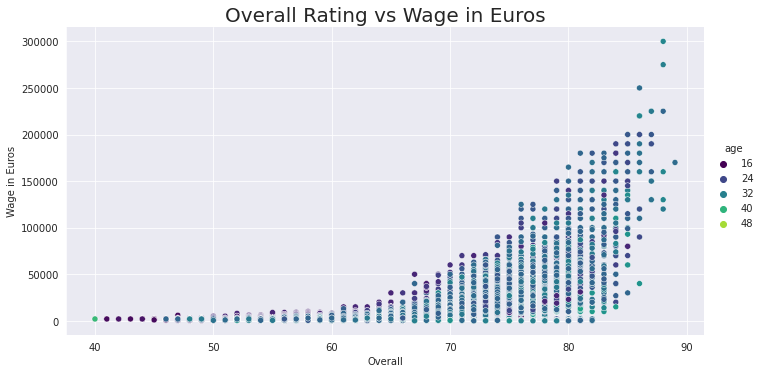

In [96]:
sn.relplot(x='overall',y='wage_eur',hue='age',palette = 'viridis', sizes=(25, 200),aspect=2,data=fifa_df_tmp)
plt.title('Overall Rating vs Wage in Euros',fontsize = 20)
plt.xlabel('Overall')
plt.ylabel('Wage in Euros')
plt.show()

### Movement Reactions Rating vs Wage in Euros

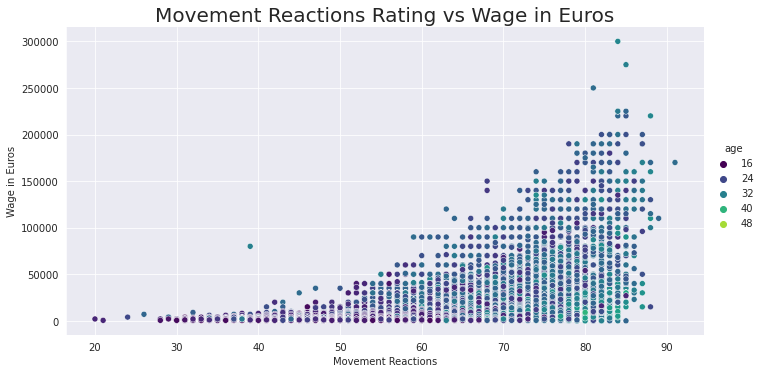

In [97]:
sn.relplot(x='movement_reactions',y='wage_eur',hue='age',palette = 'viridis', sizes=(25, 200),aspect=2,data=fifa_df_tmp)
plt.title('Movement Reactions Rating vs Wage in Euros',fontsize = 20)
plt.xlabel('Movement Reactions')
plt.ylabel('Wage in Euros')
plt.show()

### Potential Rating vs Wage in Euros

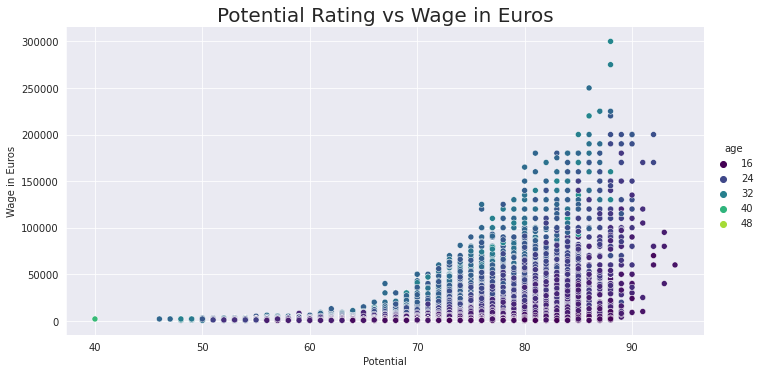

In [98]:
sn.relplot(x='potential',y='wage_eur',hue='age',palette = 'viridis', sizes=(25, 200),aspect=2,data=fifa_df_tmp)
plt.title('Potential Rating vs Wage in Euros',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Wage in Euros')
plt.show()

In [99]:
fifa_df.columns

Index(['age', 'league_rank', 'overall', 'potential', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves',
       'contract_valid_until', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'nationality_Cat',
       'club_name_Cat',

# Models

## Defining methods


> `A method that will calculate the feature importance using random forest`

In [100]:
def print_feature_importances_random_forest(random_forest_model):
    
    '''
    Prints the feature importances of a Random Forest model in an ordered way.
    random_forest_model -> The sklearn.ensemble.RandomForestRegressor or RandomForestClassifier trained model
    '''
    
    # Fetch the feature importances and feature names
    importances = random_forest_model.feature_importances_
    features = random_forest_model.feature_names_in_
    
    # Organize them in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f}")

> `A method that will calculate the feature importance using shap`

In [101]:
def print_feature_importances_shap_values(shap_values, features):
    
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''

    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
        
    # Calculates the normalized version
    importances_norm = softmax(importances)

    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}

    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}

    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")


>` In this method we will use to evaluate each model we run, with regressions metrics like r2...`

In [102]:
def evaluate_regression(y, y_pred, regressor):
    
  
    '''
    Prints the most common evaluation metrics for regression
    '''
    
    mae = MAE(y, y_pred)
    mse = MSE(y, y_pred)
    rmse = mse ** (1/2)
    r2 = R2(y, y_pred)
    
    print('Regression result, for: ', regressor)
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.2f}")
    print(f"*************")
    print("")

## Splitting into Train & Test set


In [103]:
#first we split our data into input and output
# y is the output and is stored in "Class" column of dataframe
# X contains the other columns and are features or input
y = fifa_df.wage_eur
fifa_df.drop(['wage_eur'], axis=1, inplace=True)
X = fifa_df
 
# Now we split the dataset in train and test part
# here the train set is 80% and test set is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [104]:
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the training data
model.fit(X_train, y_train)
RandomForestRegressor()
# Evaluates the model
y_pred = model.predict(X_test)
evaluate_regression(y_test, y_pred, "Random Forest Regressor")

Regression result, for:  Random Forest Regressor
MAE: 3032.85
MSE: 49164781.74
RMSE: 7011.76
R2: 0.90
*************



In [105]:
# Prints the feature importances
print_feature_importances_random_forest(model)

overall -> 0.7549
league_name_Cat -> 0.0556
contract_valid_until -> 0.0290
club_name_Cat -> 0.0147
attacking_finishing -> 0.0096
age -> 0.0094
team_position_Cat -> 0.0081
movement_reactions -> 0.0041
league_rank -> 0.0038
skill_ball_control -> 0.0038
mentality_penalties -> 0.0038
BMI -> 0.0037
power_stamina -> 0.0036
potential -> 0.0034
attacking_crossing -> 0.0034
international_reputation -> 0.0033
power_jumping -> 0.0031
nationality_Cat -> 0.0031
skill_fk_accuracy -> 0.0030
mentality_vision -> 0.0030
goalkeeping_handling -> 0.0029
attacking_heading_accuracy -> 0.0029
skill_curve -> 0.0029
movement_sprint_speed -> 0.0028
mentality_positioning -> 0.0028
goalkeeping_reflexes -> 0.0027
attacking_volleys -> 0.0027
mentality_aggression -> 0.0027
movement_acceleration -> 0.0026
defending_gk_diving_combined -> 0.0025
movement_agility -> 0.0024
power_long_shots -> 0.0024
physic_gk_positioning_normalisied -> 0.0024
defending_sliding_tackle -> 0.0024
power_shot_power -> 0.0024
movement_balance 

## Cross-Validation

> `Here we are defining a method to perform a cross-validation for overfitting handling uses`

In [106]:
def cross_validation(model, X, y):
  scores = cross_val_score(model, X, y, cv=7)
  return scores

In [107]:
cross_validation(model, X_train, y_train)

array([0.89130782, 0.91095123, 0.90302911, 0.88584525, 0.90098199,
       0.88551406, 0.90901037])

## Regression Models

> `All the regressors we are excuting, are defined below and latter we will run them.`

### **Elastic Net** Regressor


In [108]:
def elastic_net_regressor(X_train_, y_train_, X_test_, y_test_):
  regressor_name = "Elastic Net Regressor"

  # Fit regression model
  regressor = ElasticNet().fit(X_train_, y_train_)

  # Predict
  y_pred_ = regressor.predict(X_test_)

  # Evaluate regression model
  evaluate_regression(y_test_, y_pred_, regressor_name)

### **Bayesian Ridge** Regressor


In [109]:
def bayesian_ridge_regressor(X_train_, y_train_, X_test_, y_test_):
  regressor_name = "Bayesian Ridge Regressor"

  # Fit regression model
  regressor = BayesianRidge().fit(X_train_, y_train_)

  # Predict
  y_pred_ = regressor.predict(X_test_)

  # Evaluate regression model
  evaluate_regression(y_test_, y_pred_, regressor_name)

### **Linear** Regressor


In [110]:
def linear_regressor(X_train_, y_train_, X_test_, y_test_):
  regressor_name = "Linear Regressor"

  # Fit regression model
  regressor = linear_model.LinearRegression().fit(X_train_, y_train_)

  # Predict
  y_pred_ = regressor.predict(X_test_)

  # Evaluate regression model
  evaluate_regression(y_test_, y_pred_, regressor_name)

###**Decision Tree** Regressor

In [111]:
def decision_tree_regressor(X_train_, y_train_, X_test_, y_test_):
  regressor_name = "Decision Tree Regressor"

  # Fit regression model
  regressor = DecisionTreeRegressor().fit(X_train_, y_train_)

  # Predict
  y_pred_ = regressor.predict(X_test_)

  # Evaluate regression model
  evaluate_regression(y_test_, y_pred_, regressor_name)

### **NN - Multi-layer Perceptron** Regressor




In [112]:
def nn_regressor(X_train_, y_train_, X_test_, y_test_):
  regressor_name = "NN - Multi-layer Perceptron Regressor"

  # Fit regression model
  regressor = MLPRegressor(hidden_layer_sizes=(120,80,40),alpha=0.05,
                        max_iter = 100,activation = 'relu',
                        solver = 'adam').fit(X_train_, y_train_)

  # Predict
  y_pred_ = regressor.predict(X_test_)

  # Evaluate regression model
  evaluate_regression(y_test_, y_pred_, regressor_name)

#### Hyper Parameter Tuning

In [113]:
def hyper_parameter_tuning(regressor, X_train_, y_train_, X_test_, y_test_):
  param_grid = {
      'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
      'max_iter': [50, 100],
      'activation': ['tanh', 'relu'],
      'solver': ['sgd', 'adam'],
      'alpha': [0.0001, 0.05],
      'learning_rate': ['constant','adaptive'],}

  grid = GridSearchCV(regressor, param_grid, n_jobs= -1, cv=5)

  grid.fit(X_train_, y_train_)

  print(grid.best_params_) 

  grid_predictions = grid.predict(X_test_) 
  evaluate_regression(y_test_, grid_predictions,"Hyper Parameter Tuning")

### **XGBoost** Regressor

In [114]:
def xgboost_regressor(X_train_, y_train_, X_test_, y_test_):
  regressor_name = "XGBoost Regressor"
  # Fit regression model
  regressor = XGBRegressor().fit(X_train_, y_train_)

  # Predict
  y_pred_ = regressor.predict(X_test_)

  # Evaluate regression model
  evaluate_regression(y_test_, y_pred_, regressor_name)

### **Gradient Boosting** Regressor


In [115]:
def gradient_boosting_regressor(X_train_, y_train_, X_test_, y_test_):
  regressor_name = "Gradient Boosting Regressor"
  
  # Fit regression model
  regressor = GradientBoostingRegressor().fit(X_train_, y_train_)

  # Predict
  y_pred_ = regressor.predict(X_test_)

  # Evaluate regression model
  evaluate_regression(y_test_, y_pred_, regressor_name)

### **Random Forest** Regressor

In [116]:
def random_forest_regressor(X_train_, y_train_, X_test_, y_test_):
  regressor_name = "Random Forest Regressor"

  # Fit regression model
  regressor = RandomForestRegressor().fit(X_train_, y_train_)

  # Predict
  y_pred_ = regressor.predict(X_test_)

  # Evaluate regression model
  evaluate_regression(y_test_, y_pred_, regressor_name)

###**LGBM** Regressor


In [117]:
def lgbm_regressor(X_train_, y_train_, X_test_, y_test_):
  regressor_name = "LGBM Regressor"
  
  # Fit regression model
  regressor = LGBMRegressor().fit(X_train_, y_train_)

  # Predict
  y_pred_ = regressor.predict(X_test_)

  # Evaluate regression model
  evaluate_regression(y_test_, y_pred_, regressor_name)

###**All** Regressors


In [118]:
def run_regressors(X_train_, y_train_, X_test_, y_test_):
  elastic_net_regressor(X_train_, y_train_, X_test_, y_test_)
  bayesian_ridge_regressor(X_train_, y_train_, X_test_, y_test_)
  linear_regressor(X_train_, y_train_, X_test_, y_test_)
  decision_tree_regressor(X_train_, y_train_, X_test_, y_test_)
  nn_regressor(X_train_, y_train_, X_test_, y_test_)
  xgboost_regressor(X_train_, y_train_, X_test_, y_test_)
  gradient_boosting_regressor(X_train_, y_train_, X_test_, y_test_)
  random_forest_regressor(X_train_, y_train_, X_test_, y_test_)
  lgbm_regressor(X_train_, y_train_, X_test_, y_test_)

### Run Regressors

#### train- test

In [119]:
run_regressors(X_train, y_train, X_test, y_test)

Regression result, for:  Elastic Net Regressor
MAE: 8897.99
MSE: 244446002.83
RMSE: 15634.77
R2: 0.48
*************

Regression result, for:  Bayesian Ridge Regressor
MAE: 7636.91
MSE: 192243197.82
RMSE: 13865.18
R2: 0.59
*************

Regression result, for:  Linear Regressor
MAE: 7638.90
MSE: 192267973.60
RMSE: 13866.07
R2: 0.59
*************

Regression result, for:  Decision Tree Regressor
MAE: 3925.37
MSE: 99426356.59
RMSE: 9971.28
R2: 0.79
*************

Regression result, for:  NN - Multi-layer Perceptron Regressor
MAE: 4484.68
MSE: 84308945.00
RMSE: 9181.99
R2: 0.82
*************

[22:00:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Regression result, for:  XGBoost Regressor
MAE: 4029.95
MSE: 67997432.22
RMSE: 8246.06
R2: 0.86
*************

Regression result, for:  Gradient Boosting Regressor
MAE: 4031.02
MSE: 68099965.35
RMSE: 8252.27
R2: 0.86
*************

Regression result, for:  Random Forest Regre

#### train- train

In [120]:
run_regressors(X_train, y_train, X_train, y_train)

Regression result, for:  Elastic Net Regressor
MAE: 9001.36
MSE: 266941413.49
RMSE: 16338.34
R2: 0.48
*************

Regression result, for:  Bayesian Ridge Regressor
MAE: 7679.19
MSE: 204649820.83
RMSE: 14305.59
R2: 0.60
*************

Regression result, for:  Linear Regressor
MAE: 7680.73
MSE: 204646153.02
RMSE: 14305.46
R2: 0.60
*************

Regression result, for:  Decision Tree Regressor
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00
*************

Regression result, for:  NN - Multi-layer Perceptron Regressor
MAE: 4932.97
MSE: 95792056.21
RMSE: 9787.34
R2: 0.81
*************

[22:11:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Regression result, for:  XGBoost Regressor
MAE: 3994.63
MSE: 64568060.58
RMSE: 8035.43
R2: 0.87
*************

Regression result, for:  Gradient Boosting Regressor
MAE: 3994.29
MSE: 63923405.06
RMSE: 7995.21
R2: 0.88
*************

Regression result, for:  Random Forest Regressor
MAE: 114

## Feature Importance/Selection for Overfitting Handling

In [121]:
#first we split our data into input and output
# y is the output and is stored in "Class" column of dataframe
# X contains the other columns and are features or input
lines_number = 25000
y_feature_importance = y.head(lines_number)
X_feature_importance = X.head(lines_number)
 
# Now we split the dataset in train and test part
# here the train set is 75% and test set is 25%
X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(X_feature_importance, y_feature_importance, test_size=0.25, random_state=2)

In [122]:
import shap
# Fits the explainer
explainer = shap.Explainer(model.predict, X_feature_importance)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_fi)
# Prints the SHAP feature importances
print_feature_importances_shap_values(shap_values, X_feature_importance.columns)

Permutation explainer: 6251it [1:10:29,  1.48it/s]

overall -> 12285.6567 (softmax = 1.0000)
contract_valid_until -> 1796.8286 (softmax = 0.0000)
league_name_Cat -> 1038.5170 (softmax = 0.0000)
age -> 684.8766 (softmax = 0.0000)
league_rank -> 560.9695 (softmax = 0.0000)
team_position_Cat -> 262.7262 (softmax = 0.0000)
club_name_Cat -> 202.6682 (softmax = 0.0000)
movement_reactions -> 189.3684 (softmax = 0.0000)
international_reputation -> 175.6532 (softmax = 0.0000)
skill_ball_control -> 136.3996 (softmax = 0.0000)
power_stamina -> 126.3077 (softmax = 0.0000)
potential -> 120.1631 (softmax = 0.0000)
pace_gk_speed_combined -> 115.3246 (softmax = 0.0000)
attacking_heading_accuracy -> 108.1141 (softmax = 0.0000)
movement_sprint_speed -> 102.8381 (softmax = 0.0000)
mentality_penalties -> 102.3557 (softmax = 0.0000)
shooting_gk_kicking_combined -> 98.7865 (softmax = 0.0000)
BMI -> 92.9365 (softmax = 0.0000)
defending_gk_diving_combined -> 89.0779 (softmax = 0.0000)
attacking_crossing -> 83.7009 (softmax = 0.0000)
attacking_finishing -> 83.1

### Select features using Boruta


In [123]:
# Default title text
# Defines the estimator used by the Boruta algorithm
estimator = RandomForestRegressor()

In [124]:
# Creates the BorutaPy object
boruta = BorutaPy(estimator = estimator, n_estimators = 'auto', max_iter = 100)

In [125]:
# Fits Boruta
boruta.fit(np.array(X_train_fi), np.array(y_train_fi))

BorutaPy(estimator=RandomForestRegressor(n_estimators=56,
                                         random_state=RandomState(MT19937) at 0x7FCEAC789D10),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FCEAC789D10)

In [126]:
# Important features
important = list(X_feature_importance.columns[boruta.support_])
print(f"Features confirmed as important: {important}")

# Tentative features
tentative = list(X_feature_importance.columns[boruta.support_weak_])
print(f"Unconfirmed features (tentative): {tentative}")

# Unimportant features
unimportant = list(X_feature_importance.columns[~(boruta.support_ | boruta.support_weak_)])
print(f"Features confirmed as unimportant: {unimportant}")

Features confirmed as important: ['age', 'overall', 'potential', 'international_reputation', 'contract_valid_until', 'attacking_finishing', 'skill_dribbling', 'movement_reactions', 'mentality_positioning', 'club_name_Cat', 'league_name_Cat', 'team_position_Cat', 'pace_gk_speed_combined', 'shooting_gk_kicking_combined']
Unconfirmed features (tentative): ['nationality_Cat']
Features confirmed as unimportant: ['league_rank', 'weak_foot', 'skill_moves', 'attacking_crossing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_vision', 'mentality_penalties', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeepin

In [127]:
# Removes them
X_train_boruta = X_train.drop(columns = unimportant)
X_test_boruta = X_test.drop(columns = unimportant)

In [128]:
X_train_boruta.head()

,age,overall,potential,international_reputation,contract_valid_until,attacking_finishing,skill_dribbling,movement_reactions,mentality_positioning,nationality_Cat,club_name_Cat,league_name_Cat,team_position_Cat,pace_gk_speed_combined,shooting_gk_kicking_combined
9335,25,66,68,1,2020.0,61,58,69,69,172,477,35,10,0.565789,0.607595
6991,23,66,72,1,2016.0,67,71,62,63,105,20,20,27,0.763158,0.670886
3008,28,73,73,1,2023.0,59,70,74,66,21,833,5,28,0.710526,0.645570
17814,18,50,63,1,2020.0,22,41,40,40,9,32,16,28,0.605263,0.151899
10688,32,65,65,1,2017.0,11,12,64,14,90,351,29,28,0.785714,0.716216


#### Run Regression after feature selection

##### train- test

In [129]:
run_regressors(X_train_boruta, y_train, X_test_boruta, y_test)

Regression result, for:  Elastic Net Regressor
MAE: 9097.20
MSE: 252628329.24
RMSE: 15894.29
R2: 0.47
*************

Regression result, for:  Bayesian Ridge Regressor
MAE: 7691.70
MSE: 195409818.39
RMSE: 13978.91
R2: 0.59
*************

Regression result, for:  Linear Regressor
MAE: 7691.60
MSE: 195412572.41
RMSE: 13979.00
R2: 0.59
*************

Regression result, for:  Decision Tree Regressor
MAE: 3721.07
MSE: 89912260.88
RMSE: 9482.21
R2: 0.81
*************

Regression result, for:  NN - Multi-layer Perceptron Regressor
MAE: 5692.81
MSE: 114695619.70
RMSE: 10709.60
R2: 0.76
*************

[00:06:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Regression result, for:  XGBoost Regressor
MAE: 4041.77
MSE: 66757297.35
RMSE: 8170.51
R2: 0.86
*************

Regression result, for:  Gradient Boosting Regressor
MAE: 4017.91
MSE: 66793920.89
RMSE: 8172.75
R2: 0.86
*************

Regression result, for:  Random Forest Reg

##### train- train

In [130]:
run_regressors(X_train_boruta, y_train, X_train_boruta, y_train)

Regression result, for:  Elastic Net Regressor
MAE: 9186.36
MSE: 274872077.86
RMSE: 16579.27
R2: 0.46
*************

Regression result, for:  Bayesian Ridge Regressor
MAE: 7736.31
MSE: 208313912.06
RMSE: 14433.08
R2: 0.59
*************

Regression result, for:  Linear Regressor
MAE: 7736.19
MSE: 208313900.87
RMSE: 14433.08
R2: 0.59
*************

Regression result, for:  Decision Tree Regressor
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00
*************

Regression result, for:  NN - Multi-layer Perceptron Regressor
MAE: 5215.37
MSE: 103580163.31
RMSE: 10177.43
R2: 0.80
*************

[00:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Regression result, for:  XGBoost Regressor
MAE: 4022.17
MSE: 64387498.46
RMSE: 8024.18
R2: 0.87
*************

Regression result, for:  Gradient Boosting Regressor
MAE: 3988.00
MSE: 63805030.47
RMSE: 7987.81
R2: 0.88
*************

Regression result, for:  Random Forest Regressor
MAE: 1

### Select features using Boruta-SHAP


In [131]:
# Creates a BorutaShap selector for regression
selector = BorutaShap(importance_measure = 'shap', classification = False)

In [132]:
# Fits the selector
selector.fit(X = X_train_fi, y = y_train_fi, n_trials = 100, sample = True, verbose = True)
# n_trials -> number of iterations for Boruta algorithm
# sample -> samples the data so it goes faster

  0%|          | 0/100 [00:00<?, ?it/s]

21 attributes confirmed important: ['attacking_finishing', 'club_name_Cat', 'age', 'overall', 'international_reputation', 'league_name_Cat', 'team_position_Cat', 'movement_agility', 'shooting_gk_kicking_combined', 'power_jumping', 'power_stamina', 'movement_sprint_speed', 'pace_gk_speed_combined', 'movement_acceleration', 'mentality_positioning', 'nationality_Cat', 'attacking_volleys', 'potential', 'contract_valid_until', 'BMI', 'league_rank']
30 attributes confirmed unimportant: ['preferred_foot_Cat', 'defending_standing_tackle', 'skill_long_passing', 'mentality_aggression', 'dribbling_gk_reflexes_combined', 'skill_curve', 'passing_gk_handling_combined', 'goalkeeping_positioning', 'goalkeeping_kicking', 'goalkeeping_handling', 'mentality_vision', 'attacking_crossing', 'attacking_short_passing', 'skill_fk_accuracy', 'skill_ball_control', 'skill_moves', 'defending_gk_diving_combined', 'power_shot_power', 'physic_gk_positioning_normalisied', 'goalkeeping_reflexes', 'skill_dribbling', 'mo

In [133]:
# Display features to be removed
features_to_remove = selector.features_to_remove
print(features_to_remove)

['weak_foot' 'skill_moves' 'attacking_crossing' 'attacking_short_passing'
 'skill_dribbling' 'skill_curve' 'skill_fk_accuracy' 'skill_long_passing'
 'skill_ball_control' 'movement_balance' 'power_shot_power'
 'power_strength' 'power_long_shots' 'mentality_aggression'
 'mentality_interceptions' 'mentality_vision' 'defending_standing_tackle'
 'defending_sliding_tackle' 'goalkeeping_diving' 'goalkeeping_handling'
 'goalkeeping_kicking' 'goalkeeping_positioning' 'goalkeeping_reflexes'
 'preferred_foot_Cat' 'body_type_Cat' 'nation_position_Cat'
 'passing_gk_handling_combined' 'dribbling_gk_reflexes_combined'
 'defending_gk_diving_combined' 'physic_gk_positioning_normalisied']


In [134]:
# Removes them
X_train_boruta_shap = X_train.drop(columns = features_to_remove)
X_test_boruta_shap = X_test.drop(columns = features_to_remove)

In [135]:
X_train_boruta_shap.head()

,age,league_rank,overall,potential,international_reputation,contract_valid_until,attacking_finishing,attacking_heading_accuracy,attacking_volleys,movement_acceleration,...,power_stamina,mentality_positioning,mentality_penalties,nationality_Cat,club_name_Cat,league_name_Cat,team_position_Cat,pace_gk_speed_combined,shooting_gk_kicking_combined,BMI
9335,25,1.0,66,68,1,2020.0,61,57,35,69,...,75,69,63,172,477,35,10,0.565789,0.607595,21.100705
6991,23,2.0,66,72,1,2016.0,67,59,52,80,...,74,63,63,105,20,20,27,0.763158,0.670886,26.093275
3008,28,1.0,73,73,1,2023.0,59,25,64,73,...,92,66,65,21,833,5,28,0.710526,0.645570,24.158818
17814,18,4.0,50,63,1,2020.0,22,41,24,68,...,74,40,31,9,32,16,28,0.605263,0.151899,22.052190
10688,32,1.0,65,65,1,2017.0,11,11,15,54,...,30,14,26,90,351,29,28,0.785714,0.716216,24.220227


#### Run Regression after feature selection

##### train - test

In [136]:
run_regressors(X_train_boruta_shap, y_train, X_test_boruta_shap, y_test)

Regression result, for:  Elastic Net Regressor
MAE: 9081.03
MSE: 251774904.55
RMSE: 15867.42
R2: 0.47
*************

Regression result, for:  Bayesian Ridge Regressor
MAE: 7681.91
MSE: 195154388.54
RMSE: 13969.77
R2: 0.59
*************

Regression result, for:  Linear Regressor
MAE: 7682.71
MSE: 195158344.93
RMSE: 13969.91
R2: 0.59
*************

Regression result, for:  Decision Tree Regressor
MAE: 3795.99
MSE: 93601447.15
RMSE: 9674.78
R2: 0.80
*************

Regression result, for:  NN - Multi-layer Perceptron Regressor
MAE: 4732.18
MSE: 94497347.69
RMSE: 9720.97
R2: 0.80
*************

[09:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Regression result, for:  XGBoost Regressor
MAE: 3984.85
MSE: 66330393.00
RMSE: 8144.35
R2: 0.86
*************

Regression result, for:  Gradient Boosting Regressor
MAE: 4023.16
MSE: 68044598.19
RMSE: 8248.91
R2: 0.86
*************

Regression result, for:  Random Forest Regre

##### train - train

In [137]:
run_regressors(X_train_boruta_shap, y_train, X_train_boruta_shap, y_train)

Regression result, for:  Elastic Net Regressor
MAE: 9171.09
MSE: 274312649.27
RMSE: 16562.39
R2: 0.47
*************

Regression result, for:  Bayesian Ridge Regressor
MAE: 7723.65
MSE: 208044211.20
RMSE: 14423.74
R2: 0.59
*************

Regression result, for:  Linear Regressor
MAE: 7724.19
MSE: 208043420.08
RMSE: 14423.71
R2: 0.59
*************

Regression result, for:  Decision Tree Regressor
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00
*************

Regression result, for:  NN - Multi-layer Perceptron Regressor
MAE: 4635.81
MSE: 90108539.46
RMSE: 9492.55
R2: 0.82
*************

[09:27:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Regression result, for:  XGBoost Regressor
MAE: 3960.15
MSE: 63623139.94
RMSE: 7976.41
R2: 0.88
*************

Regression result, for:  Gradient Boosting Regressor
MAE: 3996.93
MSE: 64954515.99
RMSE: 8059.44
R2: 0.87
*************

Regression result, for:  Random Forest Regressor
MAE: 112

## Run Cross Validation after feature selection

In [138]:
def lgbm_regressor_with_cross_validation(X_train_, y_train_, X_test_, y_test_):
  regressor_name = "LGBM Regressor"
  
  # Fit regression model
  regressor = LGBMRegressor().fit(X_train_, y_train_)

  # Predict
  y_pred_ = regressor.predict(X_test_)

  # Evaluate regression model
  scores = cross_validation(model, X_train, y_train)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
  # evaluate_regression(y_test_, y_pred_, regressor_name)

In [139]:
lgbm_regressor_with_cross_validation(X_train_boruta, y_train, X_test_boruta, y_test)

0.90 accuracy with a standard deviation of 0.01


## LightGBM Hyperparameter Tuning with Optuna


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 100 trials
     .. Evaluation metric: r2 
     .. Study direction: minimize mean_squared_error

     . Trial number: 0 finished
     .. Optimization score (lower-better): mean_squared_error: 40570144.819563985
     .. Evaluation score (greater-better): r2: 0.914675972585768
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): mean_squared_error: 37279875.03230413
     .. Evaluation score (greater-better): r2: 0.9233769444165062
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): mean_squared_error: 40609013.10579003
     .. Evaluation score (greater-better): r2: 0.9226012189526009
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): 

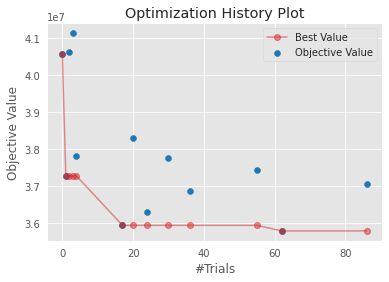

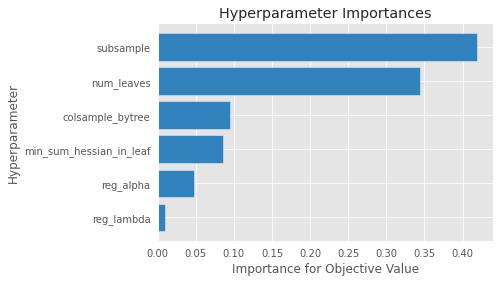

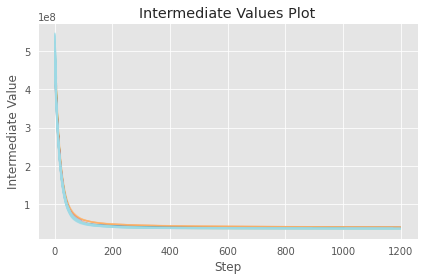

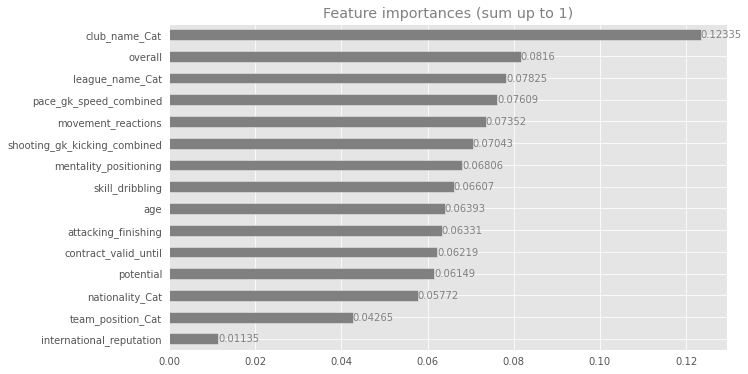


     . Optuna hyperparameters optimization finished
     .. Best trial number:62    |     mean_squared_error:           35798720.311596684
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration: 1439   |     r2:           0.9335852767508673

Time elapsed for fit execution: 4 min 17.674 sec


In [140]:
# tune the hyperparameters and fit the optimized model
tuner = LGBMTuner(metric = 'r2') # <- the only required argument
tuner.fit(X_train_boruta, y_train)
# check the optimization log in the console.
y_pred_ = tuner.predict(X_test_boruta)

In [141]:
def lgbm_regressor_tuned(X_train_, y_train_, X_test_, y_test_):
  regressor_name = "LGBM Regressor"
  
  # Fit regression model
  regressor = LGBMRegressor(num_leaves=162,
                            learning_rate=0.03,
                            n_estimators=905,
                            objective='regression',
                            subsample=0.9599755236122137,
                            colsample_bytree=0.9069124555467809,
                            reg_alpha=3.4025974422458123e-07,
                            reg_lambda=6.549835693238638e-07,
                            random_state=42).fit(X_train_, y_train_)

  # Predict
  y_pred_ = regressor.predict(X_test_)

  # Evaluate regression model
  evaluate_regression(y_test_, y_pred_, regressor_name)

In [142]:
lgbm_regressor_tuned(X_train_boruta, y_train, X_test_boruta, y_test)

Regression result, for:  LGBM Regressor
MAE: 2546.91
MSE: 34927627.23
RMSE: 5909.96
R2: 0.93
*************

